<a href="https://colab.research.google.com/github/JasmineZhen218/ADproject/blob/master/MultiResolution/Multiresolution_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiresolution analysis
* This notebook will show some examples of Probability-weighted local mean and local standard deviation.
* It is a approach to extract  abstract texture of images

In [1]:
from google.colab import drive
drive.mount("/content/drive")
dat_dir="/content/drive/My Drive/ADproject/MultiResolution"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os

### Display tricks
* If we show probability-weighted local mean and local standard deviation using the default colormap. There will be a problem that we can not tell wether the local average/ local standard deviation is low or there isn't any biomarkers here at all if we see low value somewhere.
* To solve this problem, we used 4-channel colormap to display local average/local standard deviation.The first 3 channels show RGB values and the last channel show transparency. We filled the transparency channel with probability map. It means that if the probability map tells that it is highly likely that there are no biomarkers at a specific region, this region would be shown transparent.

In [0]:
def show_local_average(Sb,Pb,title,log=False):
  if log:
    Sb[Sb==0]=np.min(Sb[Sb>0])
    Sb=np.log(Sb)
  cmap=cm.get_cmap()
  vmin=np.min(Sb)
  vmax=np.max(Sb)
  Sb01=(Sb-vmin)/(vmax-vmin)
  RGBA_1=cmap(Sb01)
  RGBA_1[...,-1]=Pb/np.max(Pb) 
    
  f1,ax1 = plt.subplots(figsize=(10,10))
  h=ax1.imshow(RGBA_1)
  cb = plt.colorbar(h)
  ticks = cb.get_ticks()
  cb.set_ticks(ticks)
  cb.set_ticklabels(ticks*(vmax-vmin) + vmin)
  ax1.set_title(title)
  f1.show()


In [0]:
def show_local_std(Sstd,Pb,title,log=False): 
  if log:
    Sstd[Sstd==0]=np.min(Sstd[Sstd>0])
    Sstd=np.log(Sstd)  
  cmap=cm.get_cmap()  
  tmp=np.mean(Sstd[Pb>0])
  vmin=tmp*0.5
  vmax=tmp*2.0 
     
  Sstd01=(Sstd-vmin)/(vmax-vmin)
  RGBA_1=cmap(Sstd01)
  RGBA_1[...,-1]=Pb/np.max(Pb)
  
    
  f1,ax1 = plt.subplots(figsize=(10,10))
  h=ax1.imshow(RGBA_1)
  cb = plt.colorbar(h)
  ticks = cb.get_ticks()
  cb.set_ticks(ticks)
  cb.set_ticklabels(ticks*(vmax-vmin) + vmin)
  ax1.set_title(title)
  f1.show()


### Size map and its local average and standard deviation

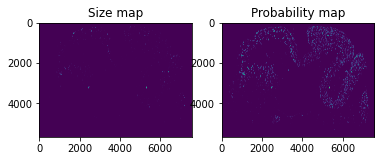

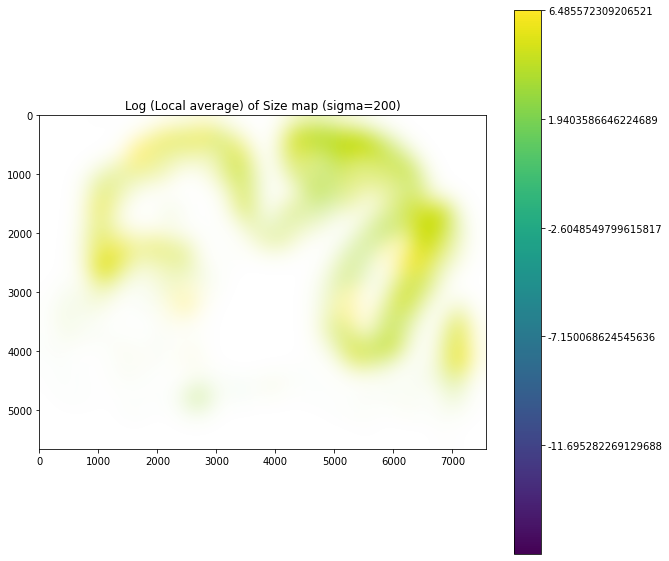

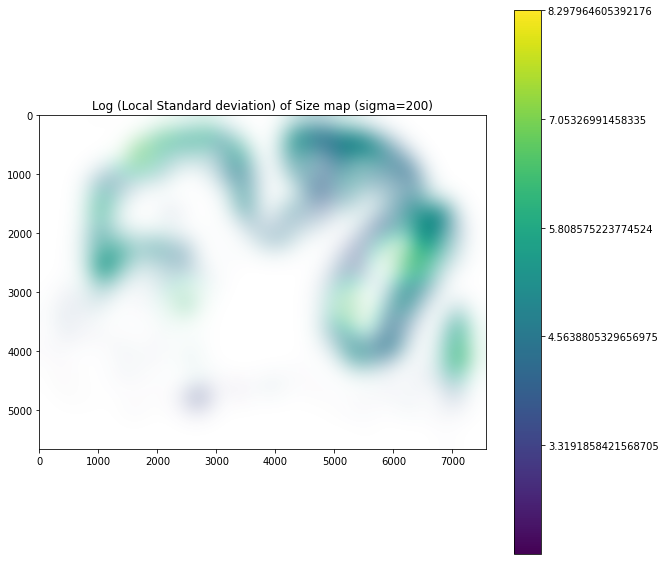

In [11]:
Feature_map=np.load(os.path.join(dat_dir,"FeatureMaps/Size_map.npy"))
Prob_map=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map.npy"))
f,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(Feature_map)
ax1.set_title("Size map")
ax2.imshow(Prob_map)
ax2.set_title("Probability map")
f.show()
prob_blur=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map_blur_200.0.npy"))
local_mean=np.load(os.path.join(dat_dir,"FeatureMaps/Size_map_local_mean_200.0.npy"))
local_std=np.load(os.path.join(dat_dir,"FeatureMaps/Size_map_local_std_200.0.npy"))
show_local_average(local_mean,prob_blur,"Log (Local average) of Size map (sigma=200)",log=True)
show_local_std(local_std,prob_blur,"Log (Local Standard deviation) of Size map (sigma=200)", log=True)

### Roundness map and its local average and standard deviation

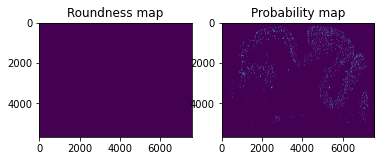

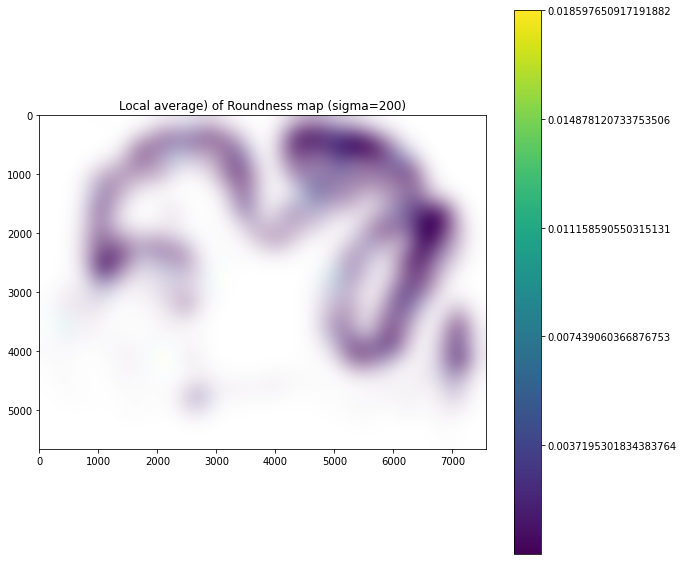

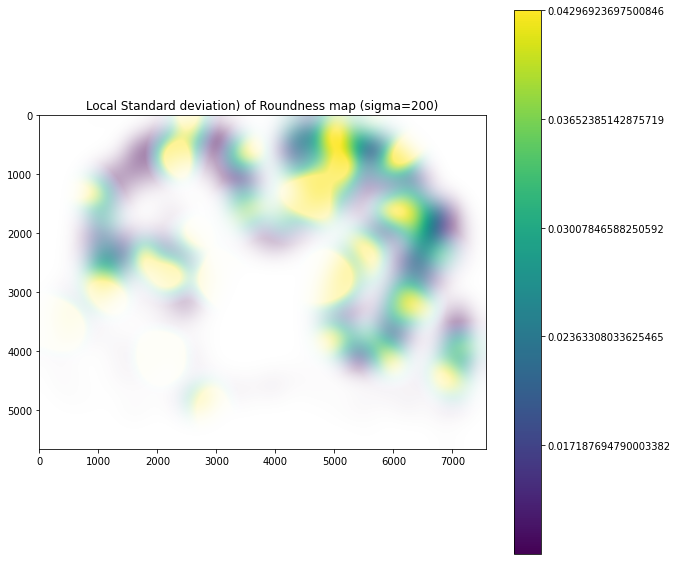

In [12]:
Feature_map=np.load(os.path.join(dat_dir,"FeatureMaps/Roundness_map.npy"))
Prob_map=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map.npy"))
f,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(Feature_map)
ax1.set_title("Roundness map")
ax2.imshow(Prob_map)
ax2.set_title("Probability map")
f.show()
prob_blur=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map_blur_200.0.npy"))
local_mean=np.load(os.path.join(dat_dir,"FeatureMaps/Roundness_map_local_mean_200.0.npy"))
local_std=np.load(os.path.join(dat_dir,"FeatureMaps/Roundness_map_local_std_200.0.npy"))
show_local_average(local_mean,prob_blur,"Local average) of Roundness map (sigma=200)")
show_local_std(local_std,prob_blur,"Local Standard deviation) of Roundness map (sigma=200)")

### Orientation map and its local average and standard deviation

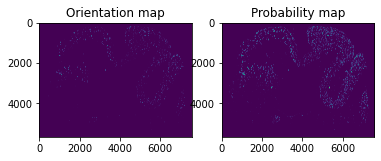

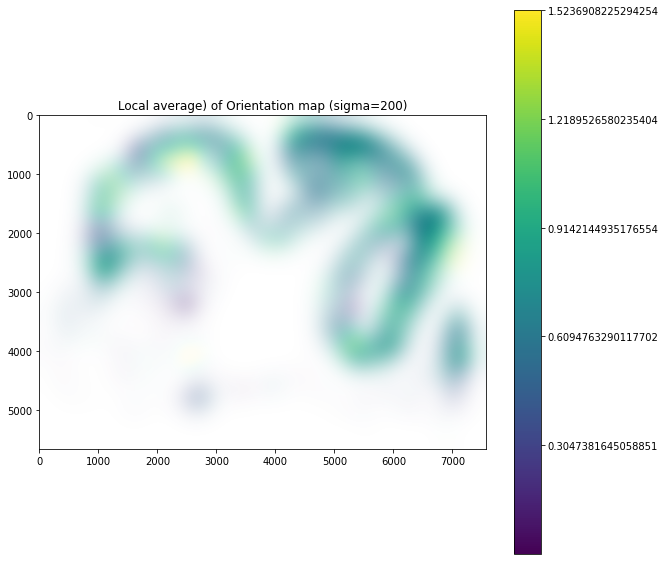

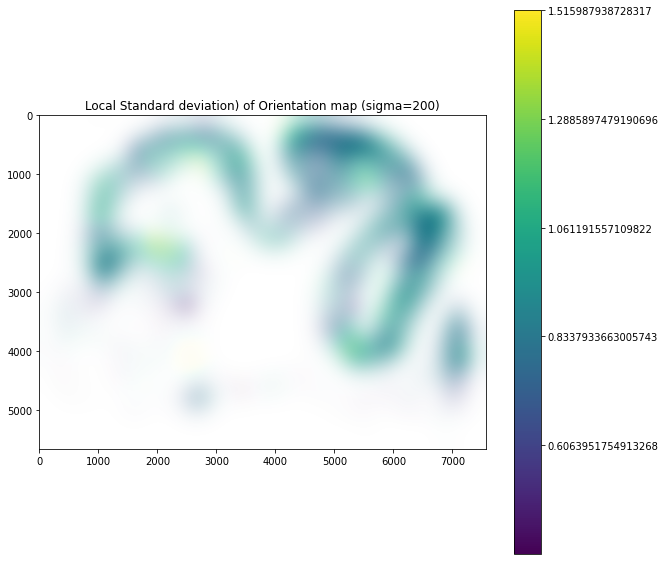

In [5]:
Feature_map=np.load(os.path.join(dat_dir,"FeatureMaps/Orientation_map.npy"))
Prob_map=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map.npy"))
f,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(Feature_map)
ax1.set_title("Orientation map")
ax2.imshow(Prob_map)
ax2.set_title("Probability map")
f.show()
prob_blur=np.load(os.path.join(dat_dir,"FeatureMaps/Prob_map_blur_200.0.npy"))
local_mean=np.load(os.path.join(dat_dir,"FeatureMaps/Orientation_map_local_mean_200.0.npy"))
local_std=np.load(os.path.join(dat_dir,"FeatureMaps/Orientation_map_local_std_200.0.npy"))
show_local_average(local_mean,prob_blur,"Local average) of Orientation map (sigma=200)")
show_local_std(local_std,prob_blur,"Local Standard deviation) of Orientation map (sigma=200)")